In [1]:
import datetime
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns
import string

from os import listdir

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib

def figsize(scale,ratio, fig_width_pt= 468    ):# Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    if(ratio == "golden"):                          # Golden ratio ...
        fig_height = fig_width*golden_mean          # height in inches
    else:                                           # ... or other ratio
        fig_height = fig_width*ratio
        
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "pgf.preamble": [
        r'\usepackage[light,math]{kurier}',
        r'\usepackage{amsmath}',
        ]
    }

plt.rcParams['axes.edgecolor']='k'

#### Important dates

In [3]:
important_dates_state = {}

In [4]:
# AZ
# https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Arizona
important_dates = []
# first case
important_dates.append(('first case',datetime.datetime(2020,1,26)))#.timetuple().tm_yday))

# By March 12, several universities (including all three state universities and some community colleges) 
# announced that courses would be moved to an online. school closed with stay at home
important_dates.append(('university online',datetime.datetime(2020,3,12)))#.timetuple().tm_yday))

# On March 30, Gov. Ducey issued a statewide stay at home order to stop the spread 
# of new coronavirus, barring Arizonans from leaving their residences except for food, medicine, 
# and other essentials. The order took effect at the close of business March 31.
important_dates.append(('stay-at-home', datetime.datetime(2020,3,31)))#.timetuple().tm_yday))

# Gov. Ducey announced a partial reopening to begin on May 4 with details describing how some non-essential 
# businesses can operate. The stay at home order was extended until May 15. 
# Barbershops along with nail and hair salons would begin reopening on May 8 while restaurants would be 
# allowed to open dining rooms May 11
important_dates.append(('partial reopening', datetime.datetime(2020,5,4)))#.timetuple().tm_yday))

# On May 15, the statewide lockdown order expired.
# Effective May 16, in accordance with an executive order from Governor Ducey, local governments were not permitted 
# to institute requirements or restrictions related to COVID-19 beyond the state-level restrictions. 
# This prevented local governments from requiring people to wear face masks
# On May 31, two weeks after the expiration of the Governor's stay at home order, the percentage of positives of total PCR tests, 
# reported weekly, was 12%. Two weeks after the stay-at-home-order expired, the state reported a record high of daily hospitalizations 
# suspected to be related to COVID-19, with 1,009 hospitalizations recorded on Monday, June 1
important_dates.append(('stay-at-home expired', datetime.datetime(2020,5,15)))#.timetuple().tm_yday))


# On June 29, Governor Ducey ordered bars, movie theaters, and gyms to close again in a partial reversal 
# of the state's reopening
important_dates.append(('partial reversal stay-at-home', datetime.datetime(2020,6,29)))

important_dates_state['AZ'] = important_dates

In [5]:
# https://en.wikipedia.org/wiki/COVID-19_pandemic_in_New_York_(state)
important_dates = []
# first case
important_dates.append(('first case',datetime.datetime(2020,3,1)))#.timetuple().tm_yday))

# All New York City schools ordered to close until April 20
important_dates.append(('school closure',datetime.datetime(2020,3,15)))#.timetuple().tm_yday))

# On March 20, State-wide stay-at-home order declared. Effective March 22. All non-essential businesses ordered to close. 
# All non-essential gatherings canceled/postponed.
important_dates.append(('stay-at-home', datetime.datetime(2020,3,22)))#.timetuple().tm_yday))

# On May 15, Phase 1 of reopening allowed for counties that met qualifications. 
# Five counties met qualifications and began reopening on this date.
# New York City meets conditions for Phase 1 on June 8
# Phase 1: construction, manufacturing, agriculture, forestry, fishing, and select retail that can offer curbside pickup.
important_dates.append(('phase-one', datetime.datetime(2020,5,15)))#.timetuple().tm_yday))

# Phase 2: outdoor dining at restaurants, hair salons and barber shops, offices, real estate firms, 
# in-store retail, vehicle sales, retail rental, repair services, cleaning services, and commercial building management.
# Certain Upstate New York regions have also progressed to Phase 2 as of May 29th
# New York City last on June 22
important_dates.append(('phase-two', datetime.datetime(2020,5,29)))#.timetuple().tm_yday))

# Phase 3: indoor dining at restaurants and bars at 50% capacity (excluding New York City) and personal care services
# Long Island enters Phase 3 of reopening
# New York City last on July 6
important_dates.append(('phase-three', datetime.datetime(2020,6,24)))#.timetuple().tm_yday))

# Phase 4: low-risk outdoor activities at 33% capacity (outdoor zoos, botanical gardens, nature parks, 
# historical sites, outdoor museums, etc.); low-risk indoor activities at 25% capacity outside of New York City 
# (malls, indoor museums, historical sites, art galleries, aquariums, etc.)
# Central New York, the Finger Lakes, the Mohawk Valley, the North Country and the Southern Tier
# NYC on July 20  
# important_dates.append(('phase-four', datetime.datetime(2020,6,26)))#.timetuple().tm_yday))

important_dates_state['NY'] = important_dates

In [6]:
# OK
# https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Oklahoma
important_dates = []
# first case
important_dates.append(('first case',datetime.datetime(2020,3,7)))#.timetuple().tm_yday))

# On March 24, Governor Stitt announced a "Safer at Home" executive order effective through April 30, 
# requiring vulnerable populations (including those over the age of 65 or with underlying health conditions) 
# to remain at their residences unless conducting essential shopping, medical appointments, or exercise. 
# Effective March 25, gatherings of more than 10 people were prohibited
# On March 25, the state board of education voted to close all public schools until the end of the school year
important_dates.append(('stay-at-home', datetime.datetime(2020,3,24)))#.timetuple().tm_yday))

# On April 23, Governor Kevin Stitt announced that phase 1 of the reopening of business would begin April 24, 
# including personal care facilities, state parks, outdoor recreation, and that dine-in restaurants (excluding bars),
# cinemas, gyms, sports venues, and places of worship could reopen on May 1, subject to social distancing 
#and other sanitation protocols and guidelines per-industry. 
important_dates.append(('phase-one', datetime.datetime(2020,4,24)))#.timetuple().tm_yday))

# Phase 2 began May 15, including reopening of bars at limited capacity, funerals and weddings, and organized sports, 
# subject to social distancing.
important_dates.append(('phase-two', datetime.datetime(2020,5,15)))#.timetuple().tm_yday))

#  Phase 3 began June 1, including businesses that had been restricted to appointments only, summer camps, 
# and limited visitation at hospitals, and for long-term care facilities in end-of-life situations. 
important_dates.append(('phase-three', datetime.datetime(2020,6,1)))#.timetuple().tm_yday))

important_dates_state['OK'] = important_dates

In [7]:
# KY
# https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Kentucky
important_dates = []
# first case
important_dates.append(('first case',datetime.datetime(2020,3,6)))#.timetuple().tm_yday))

# Andy Beshear closed schools on March 16. 
important_dates.append(('school closure',datetime.datetime(2020,3,16)))#.timetuple().tm_yday))

# By March 20, a ban on mass gatherings started and by March 26, Beshear closed most businesses 
# and started “Healthy at Home,” Kentucky’s version of a shelter in place policy.
important_dates.append(('healty-at-home', datetime.datetime(2020,3,26)))#.timetuple().tm_yday))

# In order to reopen, various businesses must follow public health guidelines set forth by industries 
# and the state in its "Healthy at Work" initiative. These rules include enforcing social distancing, 
# closing common areas and making masks universal for employees, among others. 
# The first businesses to reopen were places of worship on May 9.
# Construction, manufacturing and pet grooming, among others, May 11
important_dates.append(('start reopening ', datetime.datetime(2020,5,9)))#.timetuple().tm_yday))

# After more than two months of being forced to operate through takeout or delivery, restaurants were able 
# to welcome back customers on May 22, so long as they kept indoor seating to 33% capacity and enforced 
# social distancing with both indoor and outdoor seating.
important_dates.append(('resturants reopening', datetime.datetime(2020,5,22)))#.timetuple().tm_yday))

# On June 29, bars were permitted to welcome back customers as well — though by the state's definition of 
# "restaurant," some establishments that are commonly considered bars were able to provide in-person service
# the month prior. Now, bars and restaurants are allowed to operate at 50% capacity indoors, 
# so long as they follow social distancing and other public health guidelines.
important_dates.append(('bars reopening', datetime.datetime(2020,6,29)))#.timetuple().tm_yday))

important_dates_state['KY'] = important_dates

### Plot style

In [8]:
def set_plot_style(ax, state, xlim=None, ylim=None, title=None, xlabel=None, ylabel=None, byweekday=0, add_important_dates=True, weeks_interval=2):
    
    if title:
        ax.set_title(title,fontsize=15)
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=13)
    if ylabel:
        ax.set_ylabel(ylabel, fontsize=13)
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)
        
    # set ticks every week
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=weeks_interval, byweekday=(byweekday)))
    # set major ticks format
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    
    # remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # remove minor ticks
    ax.minorticks_off()
    
    # add vertical lines for important dates
    if add_important_dates:
        for (name, day) in important_dates_state[state]:
            ax.axvline(day, linestyle='--', color ='#AAA', linewidth=1)
            ax.text(day + datetime.timedelta(1), 0.05, name, rotation=90, transform=ax.get_xaxis_transform(), fontsize=11)

In [9]:
# get xlim and ylim values
def getPlotLim(mmin, mmax, offset):
    bottom = math.floor(mmin/offset) * offset
    top = math.ceil(mmax/offset) * offset
    return [bottom, top]

def day2date(dayofyear):
    return datetime.datetime(2020,1,1) + datetime.timedelta(days=(dayofyear -1))

In [10]:
### read font
from matplotlib import font_manager

font_dirs = ['/covid-cuebic/tmp_font/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

In [11]:
my_palette = sns.color_palette(['#ce343c','#EC8A61', '#89d4b4','#0081A7', '#72C9C8', '#547474', '#8a567a', '#743D55','#b25a97', '#efb953'])
my_palette

[(0.807843137254902, 0.20392156862745098, 0.23529411764705882),
 (0.9254901960784314, 0.5411764705882353, 0.3803921568627451),
 (0.5372549019607843, 0.8313725490196079, 0.7058823529411765),
 (0.0, 0.5058823529411764, 0.6549019607843137),
 (0.4470588235294118, 0.788235294117647, 0.7843137254901961),
 (0.32941176470588235, 0.4549019607843137, 0.4549019607843137),
 (0.5411764705882353, 0.33725490196078434, 0.47843137254901963),
 (0.4549019607843137, 0.23921568627450981, 0.3333333333333333),
 (0.6980392156862745, 0.35294117647058826, 0.592156862745098),
 (0.9372549019607843, 0.7254901960784313, 0.3254901960784314)]

In [12]:
my_palette2 = sns.color_palette(['#BBCE7B', '#8ACA8D', '#61936E', '#314A44', '#F0ECE0', '#1F2321'])
my_palette2

[(0.7333333333333333, 0.807843137254902, 0.4823529411764706),
 (0.5411764705882353, 0.792156862745098, 0.5529411764705883),
 (0.3803921568627451, 0.5764705882352941, 0.43137254901960786),
 (0.19215686274509805, 0.2901960784313726, 0.26666666666666666),
 (0.9411764705882353, 0.9254901960784314, 0.8784313725490196),
 (0.12156862745098039, 0.13725490196078433, 0.12941176470588237)]

# Figure 2


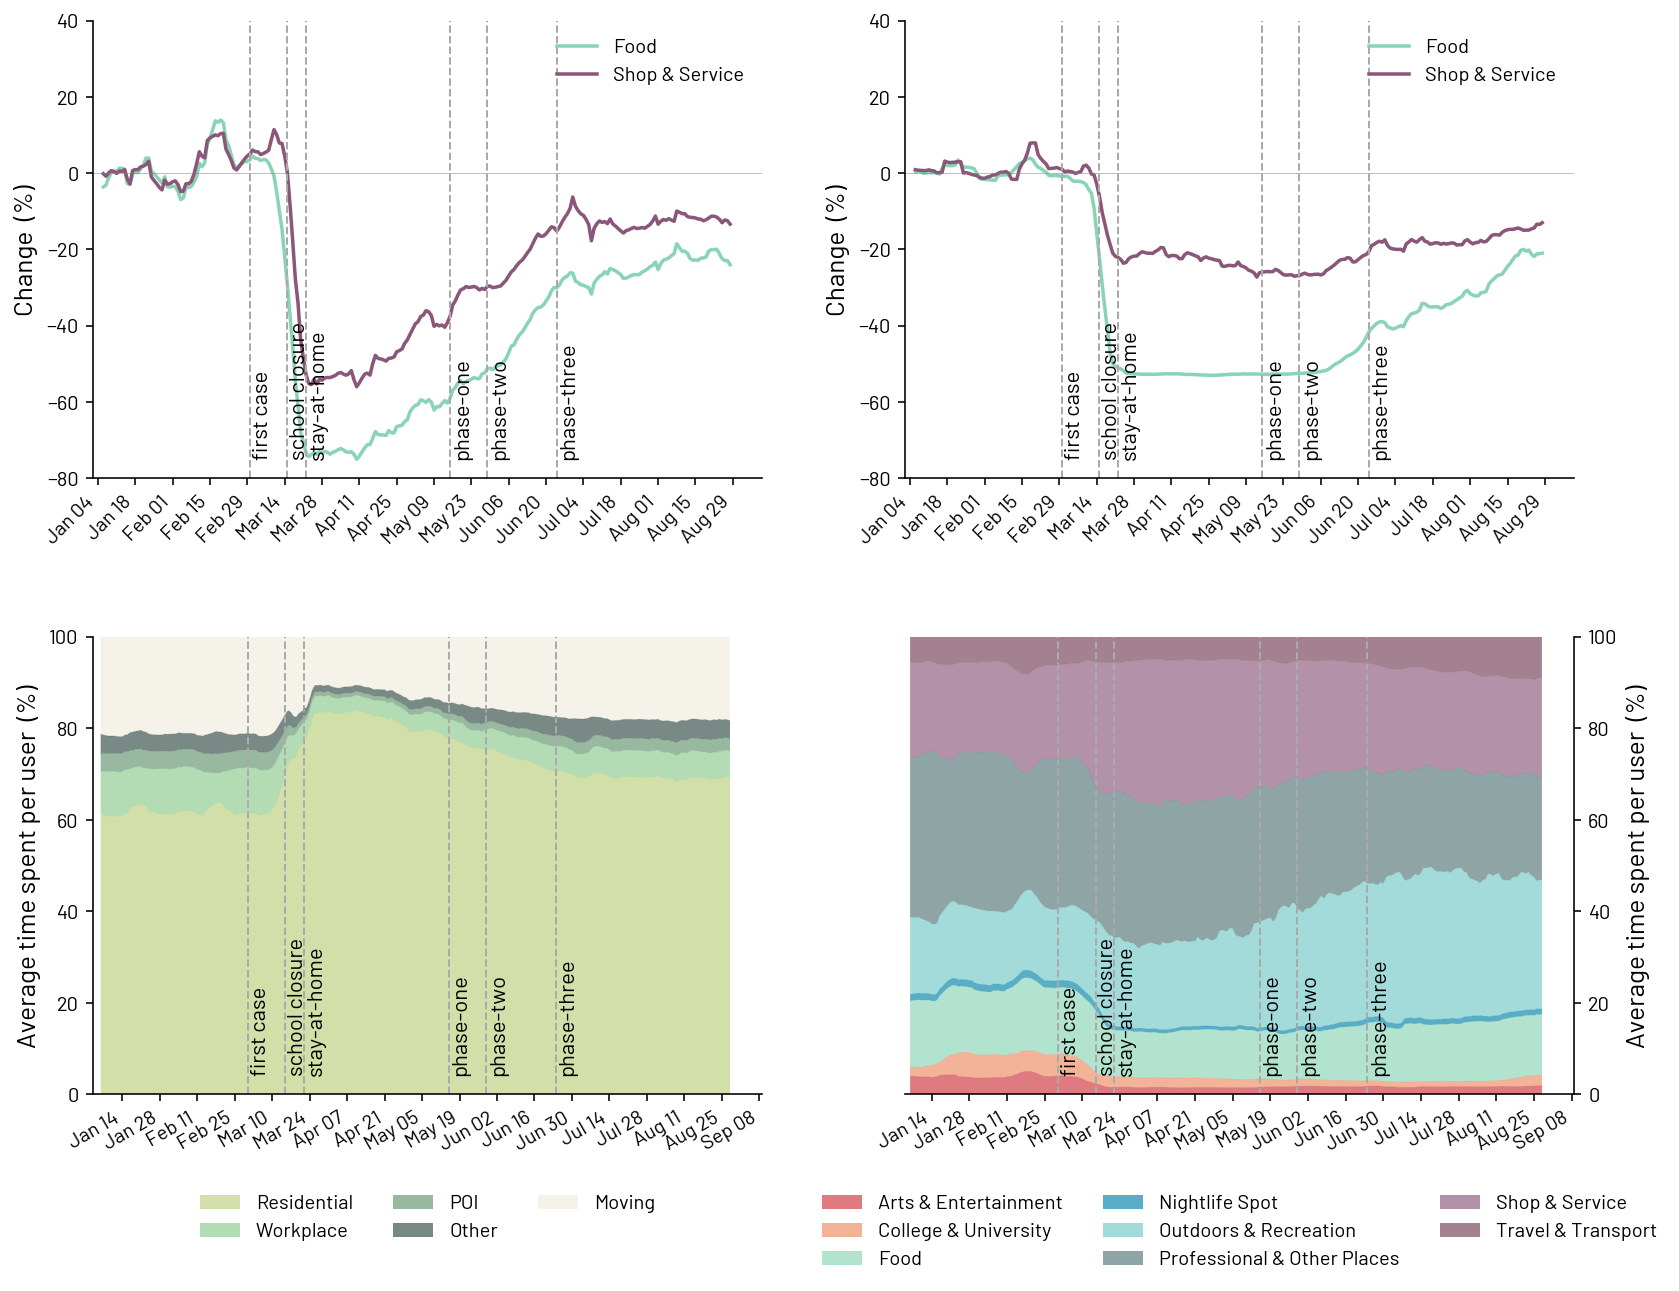

In [13]:
US_STATE = 'NY'
categories = ['Food','Shop & Service']
color_n = [2,6]

fig, axes = plt.subplots(2, 2, figsize=(12,9))

########################################################################
### visits
########################################################################

toPlot_visits = pd.read_csv('fig2_visits_NY.csv')
toPlot_visits.dayofyear = toPlot_visits.dayofyear.astype('datetime64')
toPlot_visits.set_index('dayofyear',inplace=True)

for i, category in enumerate(categories):
    toPlot_visits[category].rolling(7,center=True).mean().plot(ax=axes[0][0], color=my_palette[color_n[i]], linewidth=1.75, legend=True)

axes[0][0].axhline(y=0, linewidth=0.25, color='grey')
    
xlim = [datetime.datetime(2020, 1, 2), datetime.datetime(2020, 9, 9)]
min_visits = toPlot_visits['Food'].rolling(7,center=True).mean().min()
max_visits = toPlot_visits['Food'].rolling(7,center=True).mean().max()
ylim1 = getPlotLim(min_visits, max_visits, 20)
ylim1 = list(np.array(ylim1) + np.array([0,20]))

axes[0][0].set_yticks(np.arange(ylim1[0], ylim1[1]+1, 20))

set_plot_style(axes[0][0], US_STATE, xlim, ylim1, xlabel=' ', ylabel='Change  (%)', byweekday=5)

axes[0][0].legend(frameon=False)

########################################################################
### time spent  
########################################################################

toPlot_time_spent = pd.read_csv('fig2_time_spent_NY.csv')
toPlot_time_spent.dayofyear = toPlot_time_spent.dayofyear.astype('datetime64')
toPlot_time_spent.set_index('dayofyear',inplace=True)

for i, category in enumerate(categories):
    toPlot_time_spent[category].rolling(7,center=True).mean().plot(ax=axes[0][1], color=my_palette[color_n[i]], linewidth=1.75, legend=True)

axes[0][1].axhline(y=0, linewidth=0.25, color='grey')

xlim = [datetime.datetime(2020, 1, 2), datetime.datetime(2020, 9, 9)]
min_spent = toPlot_time_spent['Food'].rolling(7,center=True).mean().min()
max_spent = toPlot_time_spent['Food'].rolling(7,center=True).mean().max()

axes[0][1].set_yticks(np.arange(ylim1[0], ylim1[1]+1, 20))

set_plot_style(axes[0][1], US_STATE, xlim, ylim1, xlabel=' ', ylabel='Change  (%)', byweekday=5) 

axes[0][1].legend(frameon=False)

########################################################################
### time spent home/work/poi/other
########################################################################

time_spent_df = pd.read_csv('fig2_time_spent_hwou_NY.csv')
time_spent_df.date = time_spent_df.date.astype('datetime64')

axes[1][0].stackplot(time_spent_df.date, time_spent_df.home_time_perc, time_spent_df.work_time_perc, time_spent_df.poi_time_perc, 
             time_spent_df.unknown_time_perc, time_spent_df.unseen_time_perc,
             colors = my_palette2,
             alpha=0.65,
             labels=['Residential','Workplace','POI','Other', 'Moving'],
            )

xlim = [datetime.datetime(2020, 1, 3), datetime.datetime(2020, 9, 9)]
ylim = getPlotLim(0, 100, 20)
axes[1][0].set_yticks(np.arange(ylim[0], ylim[1]+1, 20))

set_plot_style(axes[1][0], US_STATE, xlim, ylim, xlabel=' ', ylabel='Average time spent per user  (%)', title=' ', byweekday=1)

tmp1 = time_spent_df.set_index('date').home_time_perc
tmp1.plot(ax=axes[1][0], linewidth=0.25, label='', color=my_palette2[0], alpha=0.45)
tmp2 = tmp1 + time_spent_df.set_index('date').work_time_perc
tmp2.plot(ax=axes[1][0], linewidth=0.25, label='', color=my_palette2[1], alpha=0.45)
tmp3 = tmp2 + time_spent_df.set_index('date').poi_time_perc
tmp3.plot(ax=axes[1][0], linewidth=0.25, label='', color=my_palette2[2], alpha=0.45)
tmp4 = tmp3 + time_spent_df.set_index('date').unknown_time_perc
tmp4.plot(ax=axes[1][0], linewidth=0.25, label='', color=my_palette2[3], alpha=0.45)

axes[1][0].set_xlabel(' ')
axes[1][0].legend(fancybox=True, shadow=True, loc='upper center', bbox_to_anchor=(0.5, -0.18), ncol=3, frameon=False)

########################################################################
### stackplot time spent POIs
########################################################################

time_spent_poi = pd.read_csv('fig2_time_spent_poi_NY.csv')
time_spent_poi.date = time_spent_poi.date.astype('datetime64')

axes[1][1].stackplot(time_spent_poi.date,
             time_spent_poi['Arts & Entertainment'],
             time_spent_poi['College & University'],
             time_spent_poi['Food'],
             time_spent_poi['Nightlife Spot'],
             time_spent_poi['Outdoors & Recreation'],
             time_spent_poi['Professional & Other Places'],
             time_spent_poi['Shop & Service'],
             time_spent_poi['Travel & Transport'],
             colors = my_palette,
             alpha=0.65,
             labels= time_spent_poi.columns[1:9].tolist()
            )


xlim = [datetime.datetime(2020, 1, 4), datetime.datetime(2020, 9, 9)] # 13 day
ylim = getPlotLim(0, 100, 20)
axes[1][1].set_yticks(np.arange(ylim[0], ylim[1]+1, 20))

set_plot_style(axes[1][1], US_STATE, xlim, ylim, xlabel=' ', ylabel='Average time spent per user  (%)', title=' ', byweekday=1)
# move ticks and label on the right
axes[1][1].spines['left'].set_visible(False)
axes[1][1].spines['right'].set_visible(True)
axes[1][1].yaxis.tick_right()
axes[1][1].yaxis.set_label_position('right')

tmp1 = time_spent_poi.set_index('date')['Arts & Entertainment']
tmp1.plot(ax=axes[1][1], linewidth=0.25, label='', color=my_palette[0], alpha=0.45)
tmp2 = tmp1 + time_spent_poi.set_index('date')['College & University']
tmp2.plot(ax=axes[1][1], linewidth=0.25, label='', color=my_palette[1], alpha=0.45)
tmp3 = tmp2 + time_spent_poi.set_index('date')['Food']
tmp3.plot(ax=axes[1][1], linewidth=0.25, label='', color=my_palette[2], alpha=0.45)
tmp4 = tmp3 + time_spent_poi.set_index('date')['Nightlife Spot']
tmp4.plot(ax=axes[1][1], linewidth=0.25, label='', color=my_palette[3], alpha=0.45)
tmp5 = tmp4 + time_spent_poi.set_index('date')['Outdoors & Recreation']
tmp5.plot(ax=axes[1][1], linewidth=0.25, label='', color=my_palette[4], alpha=0.45)
tmp6 = tmp5 + time_spent_poi.set_index('date')['Professional & Other Places']
tmp6.plot(ax=axes[1][1], linewidth=0.25, label='', color=my_palette[5], alpha=0.45)
tmp7 = tmp6 + time_spent_poi.set_index('date')['Shop & Service']
tmp7.plot(ax=axes[1][1], linewidth=0.25, label='', color=my_palette[6], alpha=0.45)

plt.xlabel(' ')

axes[1][1].legend(fancybox=True, shadow=True, loc='upper center', bbox_to_anchor=(0.5, -0.18), ncol=3, frameon=False)

plt.tight_layout()

# Figure 4

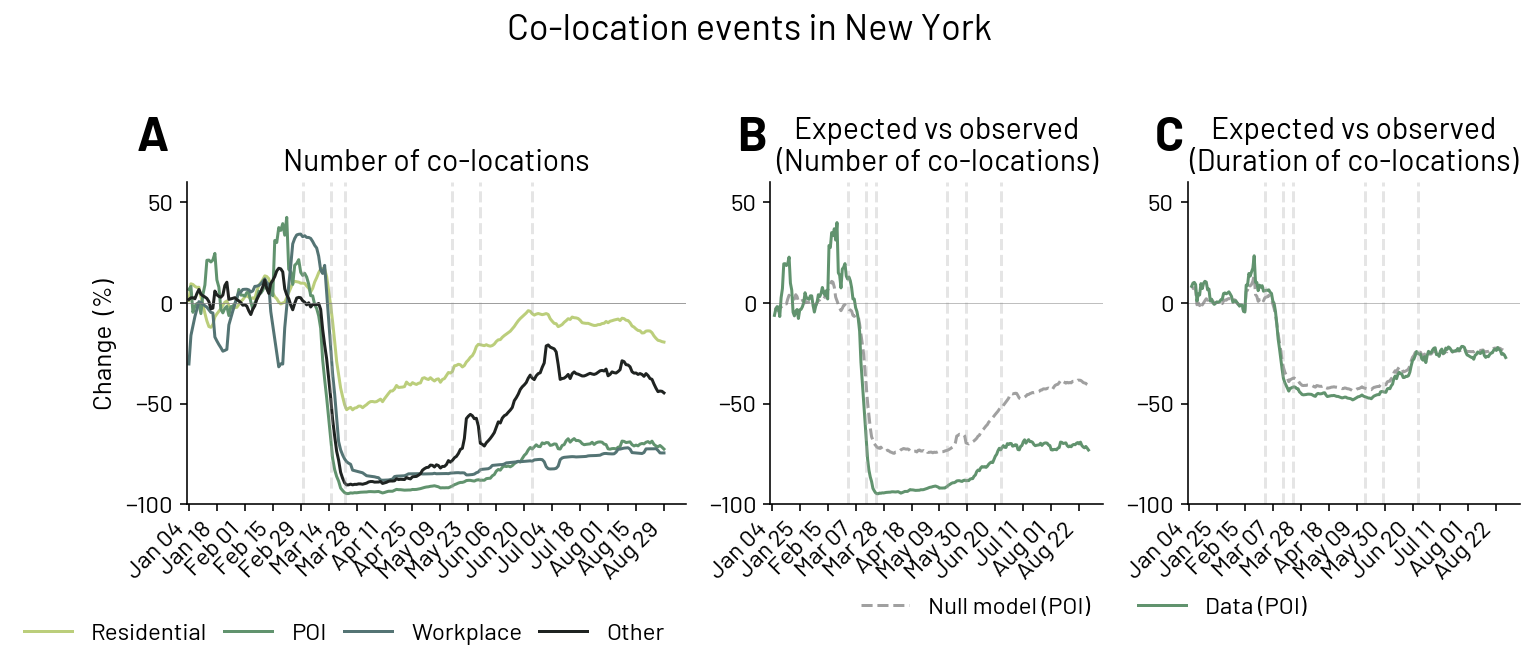

In [14]:
statename = 'NY'
START_DAY = 3
LAST_DAY = 245 # Sep 1

stop_type_filter='poi'
code2state = {'AZ':'Arizona', 'KY':'Kentucky', 'NY': 'New York', 'OK': 'Oklahoma'}

fig, axs = plt.subplots(1, 3, figsize=(11, 5), gridspec_kw={'width_ratios': [1.5, 1, 1]})

##########################################################################
### left plot
##########################################################################

# create grid
ax0 = axs[0]

colors = ['#BBCE7B', '#61936E', '#547474', '#1F2321']

data = pd.read_csv('fig4_num_colocations.csv')
data.dayofyear = data.dayofyear.astype('datetime64')
data.set_index('dayofyear', inplace=True)

for i, encounter in enumerate(['home', 'poi', 'business', 'other']):
    name = encounter.capitalize()
    if encounter == 'poi':
        name = 'POI'
    if encounter == 'home':
        name = 'Residential'
    if encounter == 'business':
        name = 'Workplace'
    data[data.encounter_type == encounter]['change_n_interactions'].rolling(7,center=True).mean().plot(legend = True, label=name, linewidth=1.5, color=colors[i], ax=ax0)

ax0.axhline(y=0, linewidth=0.25, color='grey')

xlim = [datetime.datetime(2020, 1, 3), datetime.datetime(2020, 9, 9)]
ylim = [-100, 60]

set_plot_style(ax0, statename, xlim, ylim, title='Number of co-locations', xlabel=' ', ylabel='Change  (%)', byweekday=5, add_important_dates=False)
ax0.tick_params(axis='both', which='major', labelsize=12)
ax0.legend(frameon=False, fontsize=12, ncol=4, bbox_to_anchor=(1, -0.3), columnspacing=0.7)


##########################################################################
### right plot
##########################################################################

# create grid
null_model_data = pd.read_csv('fig4_null_model_data.csv')
null_model_data.date = null_model_data.date.astype('datetime64')
# null_model_data.set_index('date', inplace=True)

toplot = null_model_data[(null_model_data.name1_fs=='all_pois') & (null_model_data.dayofyear>=START_DAY) & (null_model_data.dayofyear<=LAST_DAY)].set_index('date')
toplot[['change_expected_encounters']].rolling(7, center=True).mean().rename(columns={'change_expected_encounters':'Null model (POI)'}).plot(ax=axs[1], linestyle='--', color='#a0a0a0', legend=False)
toplot[['change_mean_n_interactions']].rolling(7, center=True).mean().rename(columns={'change_mean_n_interactions':'Data (POI)'}).plot(ax=axs[1], color='#61936E', legend=False)

toplot[['change_expected_mean_overlap_duration']].rolling(7, center=True).mean().rename(columns={'change_expected_mean_overlap_duration':'Null model (POI)'}).plot(ax=axs[2], linestyle='--', color='#a0a0a0', legend=False)
toplot[['change_mean_overlap_duration']].rolling(7, center=True).mean().rename(columns={'change_mean_overlap_duration':'Data (POI)'}).plot(ax=axs[2], color='#61936E', legend=False)

set_plot_style(axs[1], statename, xlim, ylim, title='Expected vs observed\n(Number of co-locations)'.format(statename), xlabel=' ', ylabel='Change  (%)', byweekday=5, add_important_dates=False, weeks_interval=3)
set_plot_style(axs[2], statename, xlim, ylim, title='Expected vs observed\n(Duration of co-locations)'.format(statename), xlabel=' ', ylabel='Change  (%)', byweekday=5, add_important_dates=False, weeks_interval=3)

handles, labels = axs[1].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
lgd = fig.legend(by_label.values(), by_label.keys(), ncol=2, bbox_to_anchor=(.865, 0.23), frameon=False, fontsize=12)

for ax in axs:
    for txt, day in important_dates_state['NY']:
        ax.axvline(day, linestyle='--', color ='#AAA', alpha=0.3)
        ax.tick_params(axis='both', which='major', labelsize=12)
    ax.axhline(y=0, linewidth=0.25, color='grey')

axs[1].set_ylabel('')
axs[2].set_ylabel('')

# A-B-C
letters = []
for n, a in enumerate(axs):
    letters.append(a.text(-0.1, 1.1, string.ascii_uppercase[n], transform=a.transAxes, size=24, weight='bold'))

fig.suptitle('Co-location events in {}'.format(code2state[statename]), fontsize=18, y=1.01)

fig.tight_layout()